In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload

%autoreload 2

%matplotlib notebook
sns.set()

In [2]:
import galsim
from mdetsims import End2EndSim

In [86]:
CONFIG = {
    'gal_type': 'exp',
    'psf_type': 'gauss',
    'shear_scene': True,
    'n_coadd': 10,
    'scale': 0.263,
    'n_bands': 3,
}

sim = End2EndSim(
    rng=np.random.RandomState(seed=42),
    **CONFIG,
    g1=0.02)

In [87]:
%%time

mbobs, ims = sim.get_mbobs(return_band_images=True)

CPU times: user 9.49 s, sys: 710 ms, total: 10.2 s
Wall time: 7.15 s


galsim.Shear(g1=-0.06138010560987408,g2=-0.0005400157685430565) 0.8677980118917406


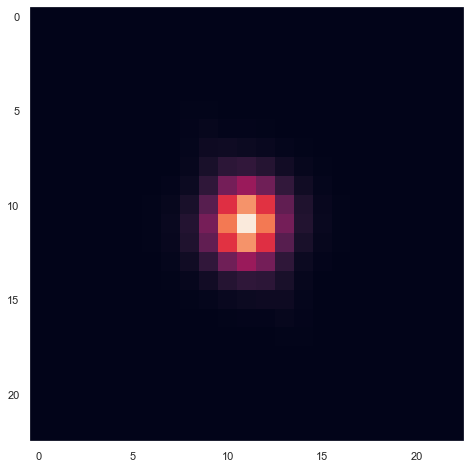

In [83]:
band = 2

plt.figure(figsize=(8, 8))
ax = plt.gca()
ax.imshow(np.arcsinh(mbobs[band][0].psf.image[26-11:26+12, 26-11:26+12]))
ax.grid(False)

from galsim.hsm import FindAdaptiveMom

psf_im = galsim.ImageD(mbobs[band][0].psf.image, scale=sim.scale)
admom = FindAdaptiveMom(psf_im)
print(admom.observed_shape, psf_im.calculateFWHM())

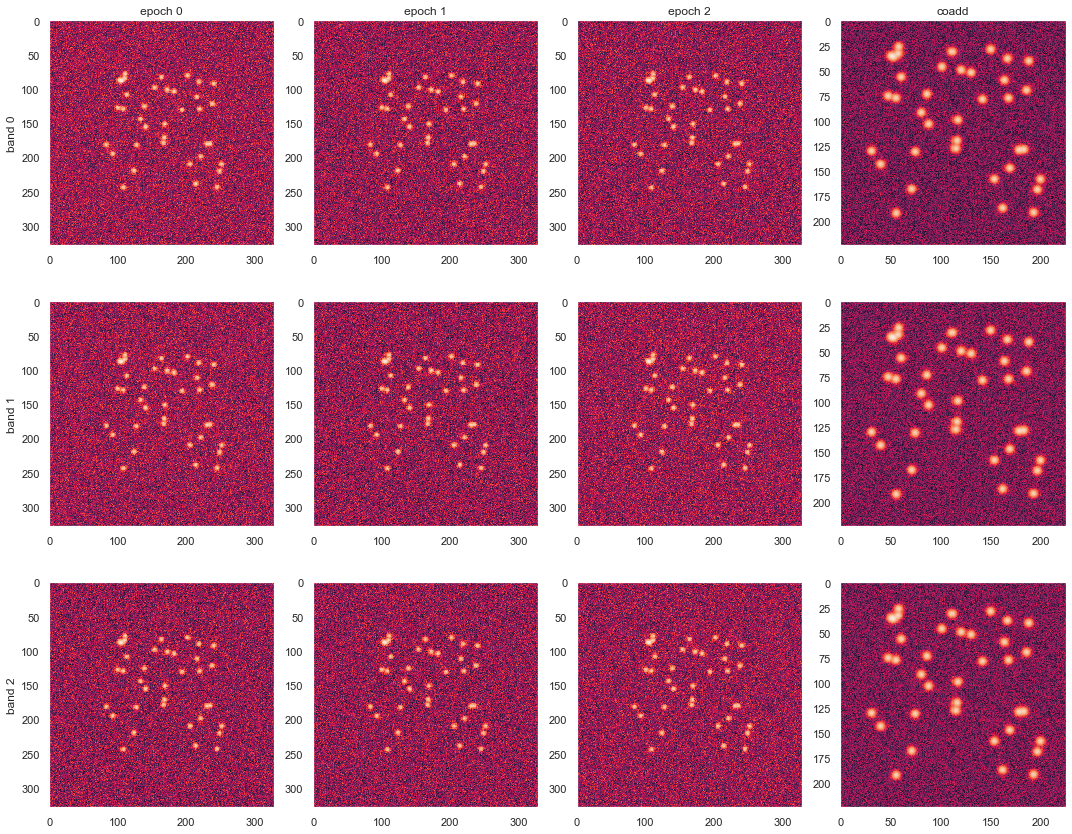

In [88]:
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(15, 12))

for band in range(3):
    for epoch in range(3):
        ax = axs[band, epoch]
        ax.imshow(np.arcsinh(ims[band][epoch]/sim.noise[band]))
        ax.grid(False)
        
        if epoch == 0:
            ax.set_ylabel('band %d' % band)
        
        if band == 0:
            ax.set_title('epoch %d' % epoch)
    
    ax = axs[band][3]
    ax.imshow(np.arcsinh(mbobs[band][0].image / np.std(mbobs[band][0].noise)))
    ax.grid(False)

    if band == 0:
        ax.set_title('coadd')


plt.tight_layout()
plt.show()